In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from mca import MCA
import prince
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from scipy import interpolate
from scipy.spatial import ConvexHull

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [31]:
#df = pd.read_csv("../data/survey_without_extreme_values.csv")
df = pd.read_csv("../data/clean_data_final.csv").drop("Unnamed: 0", axis=1)
#df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,4,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,5,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,1,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed,148000.0,2.381504
22886,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


In [32]:
clusters = df.copy()

In [33]:
clusters

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,4,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,5,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,1,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed,148000.0,2.381504
22886,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


In [34]:
clusters["how_old_are_you"].dtype

dtype('O')

In [35]:
clusters["years_of_experience_in_field"].dtype

dtype('O')

In [36]:
clusters["highest_level_of_education_completed"].dtype

dtype('O')

In [37]:
clusters["how_old_are_you"] = pd.Categorical(
    clusters["how_old_are_you"],
    ordered=True,
    categories = [
        "under 18",
        "18-24",
        "25-34",
        "35-44",
        "45-54",
        "55-64",
        "65 or over"
    ]
)

In [38]:
clusters["years_of_experience_in_field"] = pd.Categorical(
    clusters["years_of_experience_in_field"],
    ordered=True,
    categories=[
        "1 year or less",
        "2 - 4 years",
        "5-7 years",
        "8 - 10 years",
        "11 - 20 years",
        "21 - 30 years",
        "31 - 40 years",
        "41 years or more"
    ]
)

In [39]:
clusters["highest_level_of_education_completed"] = pd.Categorical(
    clusters["highest_level_of_education_completed"],
    ordered = True,
    categories=[
        "High School",
        "Some college",
        "College degree",
        "Master's degree",
        "PhD",
        "Professional degree (MD, JD, etc.)"
    ]
)

In [54]:
clusters["gender"] = pd.Categorical(clusters["gender"])
clusters["industry"] = pd.Categorical(clusters["industry"])
clusters["payed"] = pd.Categorical(clusters["payed"], ordered=True, categories=["bad payed", "well payed"])

# ACM

In [55]:
clusters["payed"].unique()

['bad payed', 'well payed']
Categories (2, object): ['bad payed' < 'well payed']

In [125]:
test = clusters.drop(
    [
        "cluster",
        "overall_years_of_professional_experience",
        "adjusted_annual_salary",
        "harmonized_salary",
        #"payed",
        #"industry",
        "how_old_are_you",
        "years_of_experience_in_field",
        #"highest_level_of_education_completed"
    ],
    axis=1
)

In [126]:
test.isna().sum()

highest_level_of_education_completed    0
gender                                  0
industry                                0
payed                                   0
dtype: int64

In [127]:
mca = prince.MCA(n_components=17, n_iter=1000, copy=True, check_input=True, engine='auto')
pls = mca.fit(test)
#pls["extreme"] = sub_df["extreme"]

Text(0, 0.5, 'Inertia (%)')

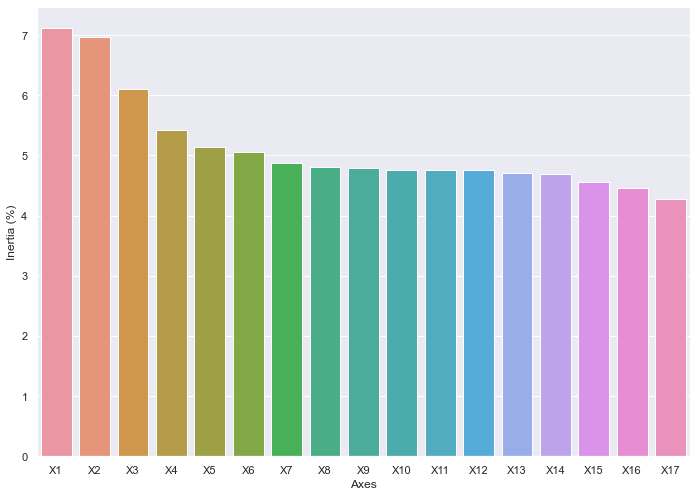

In [128]:
inertias = np.array(mca.explained_inertia_)*100
sns.barplot(x=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11",
            "X12", "X13", "X14", "X15", "X16", "X17"], y=inertias)
plt.xlabel("Axes")
plt.ylabel("Inertia (%)")

In [129]:
np.sum(inertias)

87.27563524258382

In [115]:
test2 = df[["payed"]]
test2

,payed
0,bad payed
1,well payed
2,bad payed
3,bad payed
4,bad payed
...,...
22883,well payed
22884,bad payed
22885,well payed
22886,well payed


In [88]:
mca.column_coordinates(test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
how_old_are_you_under 18,1.252494,0.905879,1.506375,1.166950,-3.072042,1.799205,0.829303,1.762100,12.973612,8.760220,20.713581,25.766091,17.859013,6.659448,8.203749,2.232358,3.587331,0.376519,18.848171,5.022429
how_old_are_you_18-24,1.825579,1.689648,-0.125689,-0.966071,-2.204154,1.415369,0.056782,-0.902581,-1.086155,0.289047,-0.261773,0.055922,-0.204464,0.008978,0.187554,-0.032679,-0.044961,-0.216443,0.323230,-0.392077
how_old_are_you_25-34,0.677988,-0.096490,0.056542,-0.072058,0.496520,-0.347732,0.076060,-0.077816,0.057202,0.052318,0.132104,-0.049622,-0.034786,0.001313,-0.023929,0.029200,0.011922,0.003498,-0.039741,0.035863
how_old_are_you_35-44,-0.507730,-0.563329,-0.199419,0.121132,-0.229077,0.666254,-0.257811,0.131974,0.102855,-0.119513,-0.103393,0.012787,0.018816,0.016815,-0.033832,-0.034090,-0.020762,0.025915,0.000775,-0.019724
how_old_are_you_45-54,-1.179391,0.590894,-0.121909,-0.013230,-0.996185,-1.314215,0.947982,0.273967,-0.153164,-0.015677,-0.066777,0.031772,0.078601,-0.072660,0.078149,0.054586,-0.032242,-0.015434,-0.070664,0.053654
how_old_are_you_55-64,-1.563804,2.762784,1.538107,0.622016,0.979863,-0.195501,-2.326094,-0.464136,-0.050115,0.204459,-0.279331,0.162603,0.067137,-0.061488,0.150433,-0.194318,0.237661,-0.056971,0.268182,-0.023062
how_old_are_you_65 or over,-1.940529,4.723733,2.793593,1.544749,5.641362,6.453084,8.430747,2.042572,-1.677329,0.079244,-0.334266,-0.074329,0.236711,0.503855,-0.142808,0.056170,-0.558845,0.292865,-0.235744,-0.291661
years_of_experience_in_field_1 year or less,1.371412,1.080831,0.221280,-0.529457,-1.901420,1.202462,0.100806,-1.058158,-0.722011,0.266673,0.311472,-1.029445,-0.746200,-0.355475,-0.011170,0.671105,-0.211067,-0.553463,1.550139,-0.103025
years_of_experience_in_field_2 - 4 years,0.876755,0.233299,0.054184,-0.183871,0.016763,-0.142620,0.109217,-0.244557,0.047392,0.126357,-0.074030,0.543967,0.550840,0.297711,0.023062,-0.477780,0.150987,0.238237,-0.995250,-0.181297
years_of_experience_in_field_5-7 years,0.380838,-0.261899,0.008404,0.041580,0.673922,-0.427881,0.050059,0.019273,0.264919,-0.080080,0.131645,-0.503884,-0.453072,0.491511,0.112398,0.439918,-0.040549,-0.319917,0.515982,0.697572


<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (7.12% inertia)', ylabel='Component 1 (6.97% inertia)'>

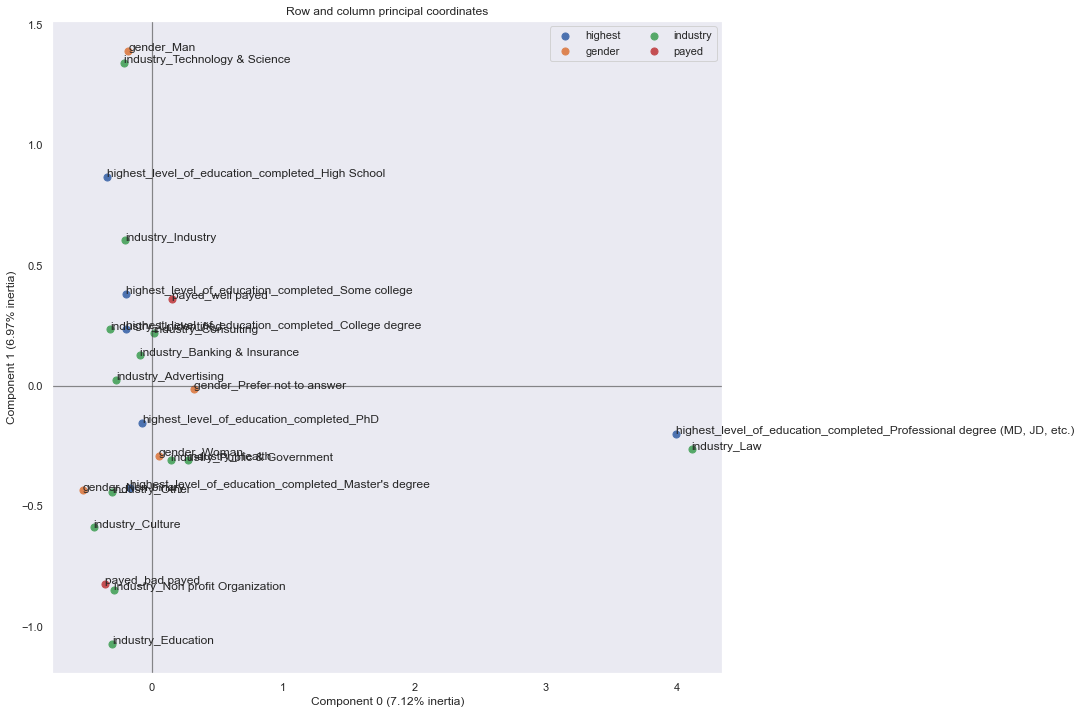

In [130]:
mca.plot_coordinates(
    X=test,
    ax=None,
    figsize=(12, 12),
    show_row_points=False,
    row_points_alpha=0.5,
    show_column_labels=True,
    show_column_points=True,
    show_row_labels=False,
    row_points_size=10,
    column_points_size=50,
    legend_n_cols=2,
)

In [117]:
def get_differenciation(x):
    if "how_old_are_you_" in x:
        return "Age"
    elif "overall_years_of_professional_experience_" in x:
        return "Overall experience"
    elif "industry_" in x:
        return "Industry"
    elif "highest_level_of_education_completed_" in x:
        return "Diploma"
    elif "category_salary" in x:
        return "Salary Category"
    elif "gender_" in x:
        return "Gender"
    elif "payed_" in x:
        return "Salary"
    else:
        return "Experience"

In [131]:
transfo = mca.column_coordinates(test).reset_index()
transfo["color"] = transfo["index"].apply(get_differenciation)
transfo["index"] = transfo["index"].str.replace("how_old_are_you_", "")
transfo["index"] = transfo["index"].str.replace("payed_", "")
transfo["index"] = transfo["index"].str.replace("gender_", "")
transfo["index"] = transfo["index"].str.replace("industry_", "")
transfo["index"] = transfo["index"].str.replace("highest_level_of_education_completed_", "")
transfo["index"] = transfo["index"].str.replace("overall_years_of_professional_experience_", "")
transfo["index"] = transfo["index"].str.replace("years_of_experience_in_field_", "")

In [82]:
transfo.to_csv("../data/acm_data_final.csv")

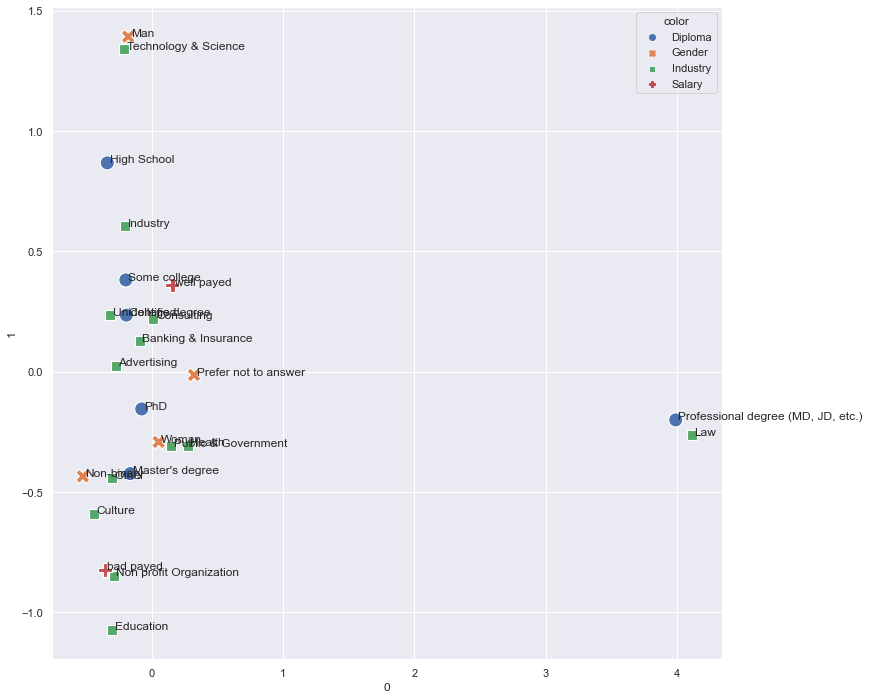

In [132]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(data=transfo, x=0, y=1, hue="color", s=200, style="color")
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(transfo[0], transfo[1], transfo["index"], plt.gca())  
plt.show()

In [80]:
mca.row_coordinates(test).to_csv("../data/mca_row_points_final.csv")

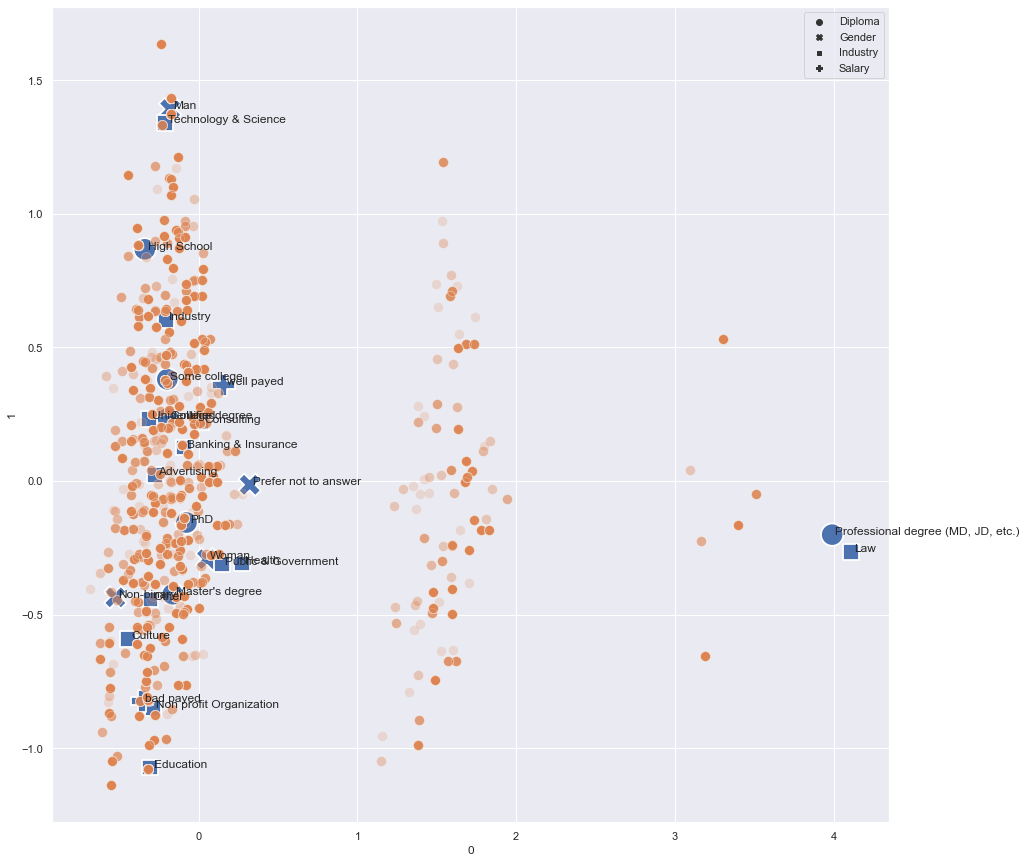

In [133]:
i=0
j=1
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(data=transfo, x=i, y=j, style="color", s=500)
sns.scatterplot(data=mca.row_coordinates(test), x=i, y=j, s=100,alpha=0.2)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(transfo[i], transfo[j], transfo["index"], plt.gca())  
plt.show()

In [62]:
row_points = mca.row_coordinates(test)
test[(row_points[1]>=2) & (row_points[1]<=5)]["payed"].value_counts()

well payed         260
very well payed    151
bad payed           37
Name: payed, dtype: int64

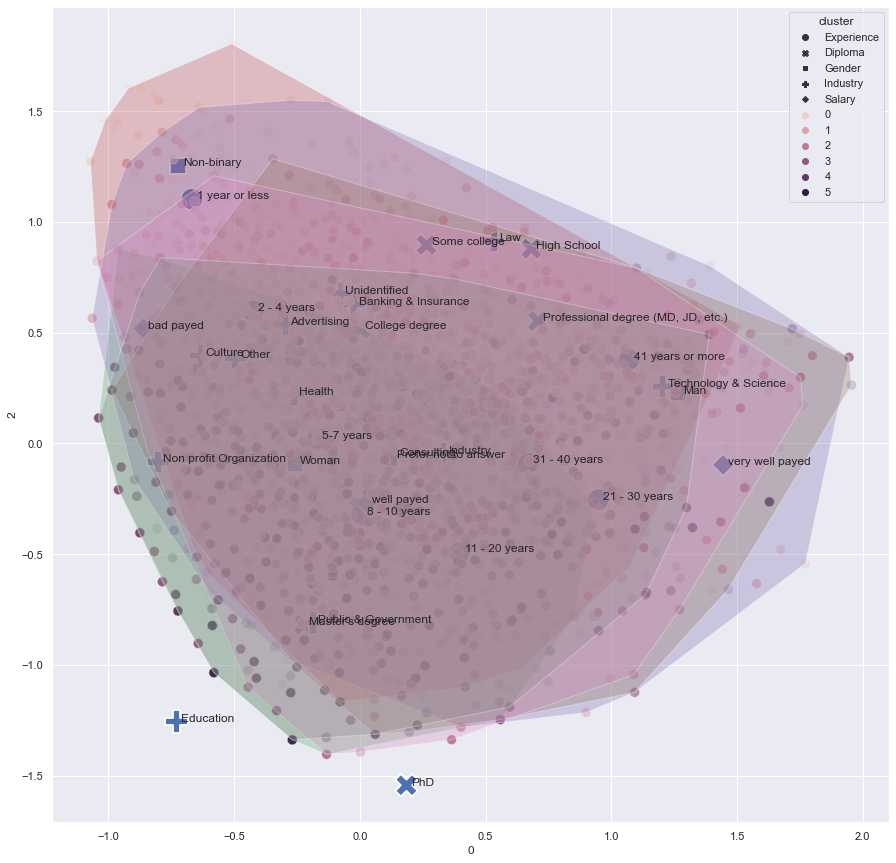

In [93]:
i=0
j=2
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(data=transfo, x=i, y=j, style="color", s=500)
sns.scatterplot(data=mca.row_coordinates(test), x=i, y=j, s=100, alpha=0.2, hue=clusters["cluster"])
for i_s in clusters["cluster"].unique():
    points = mca.row_coordinates(test)[clusters["cluster"] == i_s][[i, j]].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3)
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(transfo[i], transfo[j], transfo["index"], plt.gca())  
plt.show()

Text(0, 0.5, 'Second factorial axe')

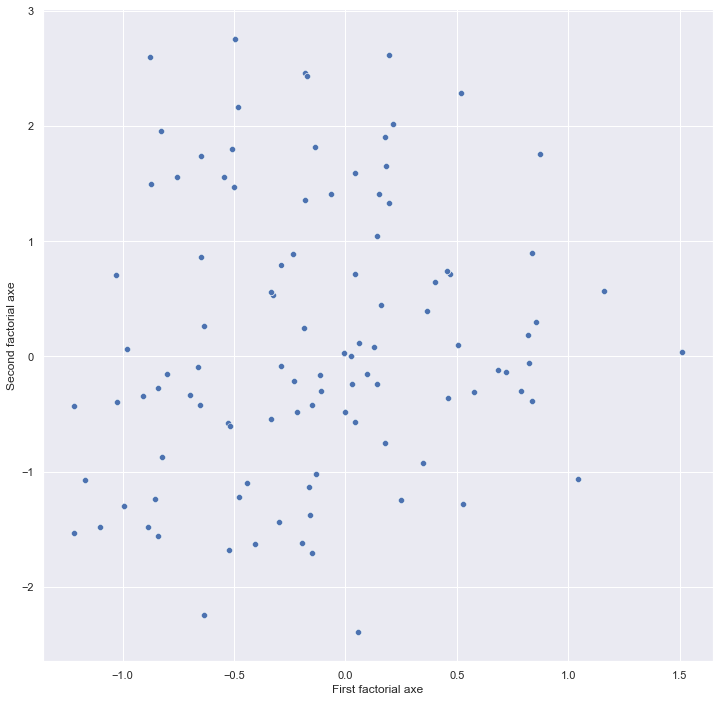

In [123]:
row_points = mca.row_coordinates(test)
row_points["payed"] = df["payed"]
i=0
j=2
plt.figure(figsize=(12, 12))
sns.scatterplot(data=row_points, x=i, y=j)
plt.xlabel("First factorial axe")
plt.ylabel("Second factorial axe")

In [93]:
row_points

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,payed
0,0.457264,-0.131519,0.109377,0.938762,0.214354,-0.277551,0.223392,-0.356309,0.340254,-0.083592,...,-0.167699,-0.353086,0.324974,0.087354,0.106564,0.085895,-0.001965,0.303361,0.284771,bad payed
1,0.594332,0.034963,-0.366052,-0.548563,0.569249,-0.218397,0.100420,-0.281831,0.904031,0.666082,...,-0.370200,0.369076,-0.120696,-0.106517,0.346328,0.002031,-0.284876,0.006437,0.125651,well payed
2,0.802786,0.328672,0.055180,-0.030220,-0.051810,-0.199831,-0.085372,0.394032,0.017800,-0.376389,...,0.107449,-0.192793,0.663851,-0.274822,-0.501990,0.210440,0.556132,-0.442411,-0.227656,bad payed
3,0.764620,-0.002591,0.048102,0.384089,0.289473,-0.356254,0.002928,0.430119,0.125241,0.113553,...,-0.102268,-0.332855,0.056992,-0.014009,-0.509498,0.230767,-0.459490,0.455642,0.330271,bad payed
4,0.654458,0.168287,0.039868,0.046283,0.178019,-0.301755,-0.107331,0.492966,0.101559,-0.457895,...,-0.313455,-0.598535,0.742469,-0.238458,-0.127596,0.132241,0.327849,0.177303,0.133798,bad payed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22883,0.377447,-0.032367,-0.102797,-0.228148,0.519040,-0.277165,-0.031699,0.445025,-0.146689,-0.532111,...,0.188630,-0.455273,-0.415898,0.291863,0.977762,1.223136,-0.318238,0.058911,0.566150,well payed
22884,0.558301,0.006594,-0.022198,0.373142,-0.194121,0.107970,-0.099041,0.409854,0.059061,0.127217,...,0.343705,0.094551,-0.015338,-0.054404,-0.909713,0.295622,-0.222040,-0.147458,-0.054045,bad payed
22885,-0.264716,-0.293214,-0.321191,-0.086517,0.205379,0.103317,-0.059799,-0.152881,-0.022058,0.329495,...,-0.107174,0.138292,0.208581,0.059530,-0.077339,0.063524,-0.031094,0.030699,0.015101,well payed
22886,0.651768,-0.002624,-0.082444,-0.262199,0.462147,-0.393863,-0.110422,0.245786,-0.689491,-0.701053,...,0.160865,0.687269,0.340796,0.589865,-0.111400,-0.186518,0.019524,-0.244653,-0.581064,well payed


              precision    recall  f1-score   support

   bad payed       0.95      0.90      0.92      1404
  well payed       0.96      0.98      0.97      3174

    accuracy                           0.95      4578
   macro avg       0.95      0.94      0.95      4578
weighted avg       0.95      0.95      0.95      4578



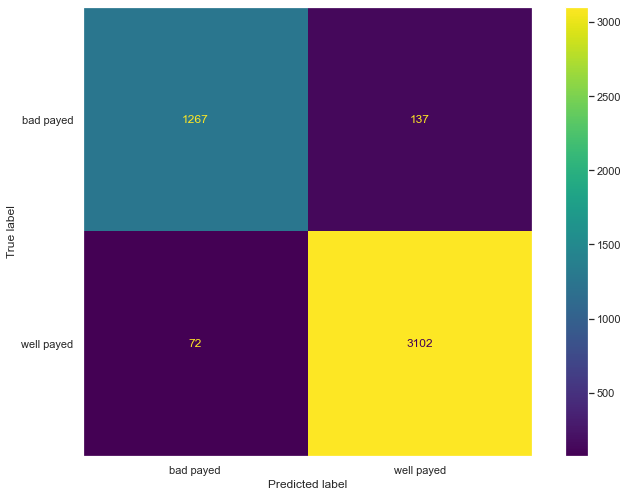

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    row_points.drop("payed", axis=1),
    row_points["payed"],
    train_size=0.8,
    random_state=29
)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

   bad payed       0.97      0.98      0.98      1404
  well payed       0.99      0.99      0.99      3174

    accuracy                           0.99      4578
   macro avg       0.98      0.99      0.98      4578
weighted avg       0.99      0.99      0.99      4578



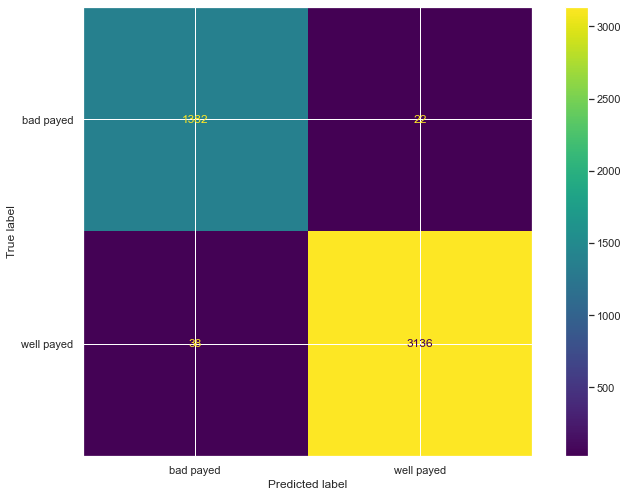

In [77]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()